# Compare different projections

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
path_fig = '/Users/dewilebars/Projects/KNMIClimateScenarios2021-2023/KNMI21/projections/figures/'

In [34]:
data_dir = '../outputs/' #'../outputs/ref_proj/'
#namelists = ['loc', 'loc_TempAll', 'loc_TempAll_odyn_CMIP5']
namelists = ['KNMI14', 'KNMIsignal', 'KNMIsignal_BiasCorr_NoWind', 'KNMIsignal_BiasCorr_WithWind']
sce = ['rcp45', 'ssp245', 'ssp245', 'ssp245']

proj_ds_list = []
for i in range(len(namelists)):
    proj_ds_list.append(xr.open_dataset(f'{data_dir}SeaLevelPerc_{namelists[i]}_{sce[i]}.nc'))

### Compare the percentiles in 2100

In [35]:
proj_ds_list[0].perc_ts.sel(time=2100, proc='Total')

<xarray.DataArray 'perc_ts' (percentiles: 11)>
array([26.014361, 33.356733, 37.373957, 41.082187, 42.393523, 52.754637,
       64.646135, 66.462299, 72.107967, 79.276543, 96.808356])
Coordinates:
    proc         <U5 'Total'
  * percentiles  (percentiles) int64 1 5 10 17 20 50 80 83 90 95 99
    time         int64 2100
Attributes:
    units:      cm
    long_name:  Time series of percentiles.

In [36]:
for idx, proj in enumerate(namelists):
    df = proj_ds_list[idx].perc_ts.sel(time=2100, proc='Total').to_dataframe()
    if idx == 0:
        tot_df = pd.DataFrame(df['perc_ts'])
        tot_df = tot_df.rename(columns={'perc_ts': proj})
    else:
        tot_df[proj] = df['perc_ts']
tot_df

,KNMI14,KNMIsignal,KNMIsignal_BiasCorr_NoWind,KNMIsignal_BiasCorr_WithWind
percentiles,,,,
1,26.014361,26.066068,23.006501,18.352189
5,33.356733,39.127271,34.409863,28.912975
10,37.373957,46.023722,40.537974,34.655477
17,41.082187,52.286031,45.994010,39.739063
20,42.393523,54.408380,47.868074,41.485369
50,52.754637,70.496529,62.000075,54.667096
80,64.646135,86.571432,76.144315,67.845029
83,66.462299,88.725432,78.018796,69.600476
90,72.107967,94.999459,83.550801,74.748116


### Compare the time series of individual contributors

In [37]:
nb_proc = len(proj_ds_list[0].proc)
perc = 50

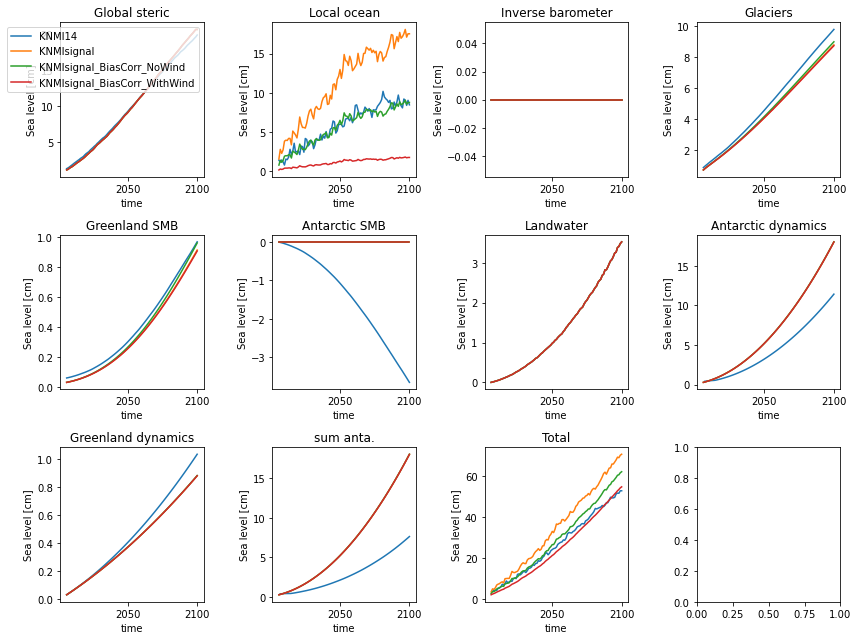

In [39]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12,9))
for m in range(nb_proc):
    lin=int(m/4)
    col=m%4
    for i in range(len(proj_ds_list)):
        proj_ds_list[i]['perc_ts'].attrs['long_name'] = 'Sea level'
        proj_ds_list[i].perc_ts.sel(percentiles=perc).isel(proc=m).plot(ax=axes[lin,col])
    axes[lin,col].set_title(proj_ds_list[0].proc[m].values)
axes[0,0].legend(namelists)
plt.tight_layout()

#plt.savefig(f'{path_fig}comp_proj_{sce[0]}_{sce[1]}.pdf', dpi=150)

In [40]:
pwd

'/Users/dewilebars/Projects/Project_ProbSLR/SLProj/notebooks'